In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
playersurl <-"https://raw.githubusercontent.com/Alexis-Jang/Group7-DSCI100project/refs/heads/main/DSCI%20100%20Players.csv"
players.csv <- "players.csv"
download.file(playersurl,players.csv, mode = "wb")
players1 <- read.csv(players.csv)
head(players1)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The players data set has 196 observations in this data set. It tells us that there are 7 variables. Below are the variables and their relevant summary statistics:
  
`experience` - character (chr) data type
- Experience level(Amateur, Regular, Pro, Veteran)

`subscribe` - logical (log) data type
- Whether or not the player subscribed
  - FALSE: 52
  - TRUE: 144

`hashedEmail` - as a character (chr) data type
- The player's email (hidden)

`played_hours` - as a double (dbl) data type
- The hours spent playing on the server 
    - minimum: 0.000 
    - maximum: 223.100
    - median: 0.100
    - mean: 5.846
    - standard deviation: 28.35734 

`name` - as a character (chr) data type
- The player's name

`gender` - as a character (chr) data type
- The player's gender

`Age` - as a double (dbl) data type
- The player's age
    - minimum: 8.00
    - maximum: 50.00
    - median: 19.00
    - mean: 20.52
    - standard deviation: 6.174667
    - NAs: 2 -> This means that 2 players did not disclose their age

In [16]:
set.seed(123)
players <- players1 |>
    select(Age, played_hours)
head(players)

,Age,played_hours
,<int>,<dbl>
1,9,30.3
2,17,3.8
3,17,0.0
4,21,0.7
5,21,0.1
6,17,0.0


In [41]:
set.seed(123)
players_split <- initial_split(players, prop = 0.60, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training <- na.omit(players_training)
players_testing <- na.omit(players_testing)

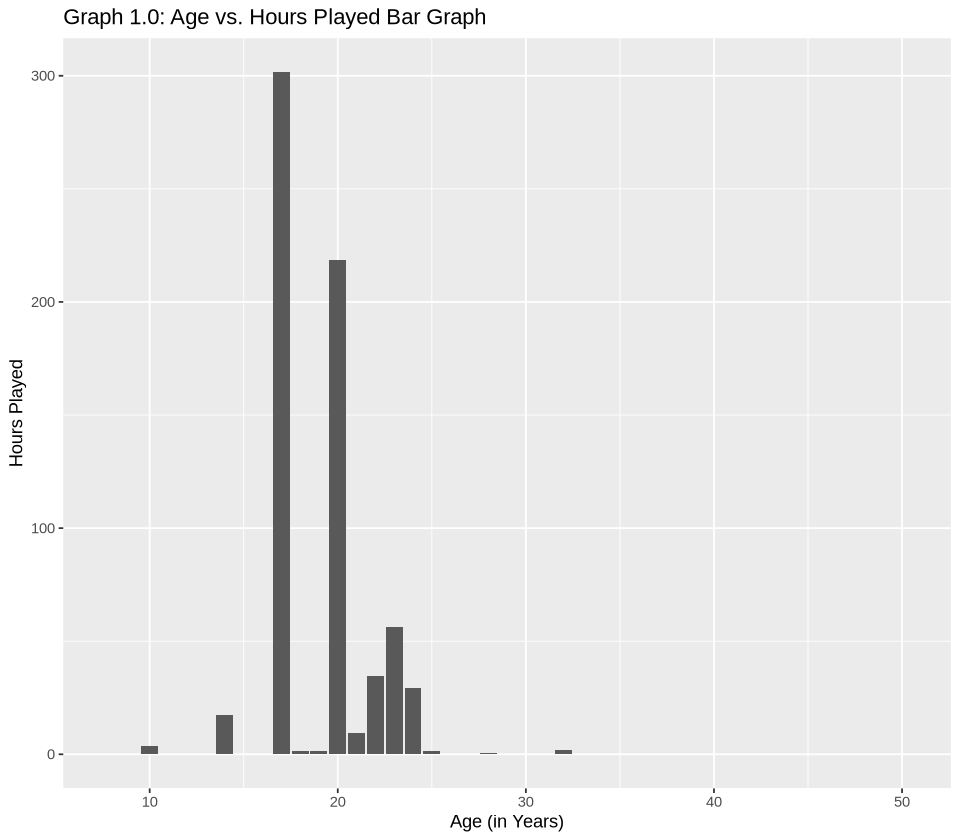

In [42]:
set.seed(123)
options(repr.plot.width = 8, repr.plot.height = 7)
age_plot <- players_training|>
    ggplot(aes(x = Age, y = played_hours))+
            geom_bar(stat = "identity") +
    labs(x = "Age (in Years)", y = "Hours Played", title = "Graph 1.0: Age vs. Hours Played Bar Graph") +
    theme(element_text(size = 15))
age_plot

In [43]:
set.seed(123)
players_grouped <- players_training|>
    group_by(Age)|>
    summarize(mean_played_time = mean(played_hours))
players_grouped

Age,mean_played_time
<int>,<dbl>
8,0.300000
10,3.600000
14,8.700000
16,0.000000
17,5.583333
18,0.300000
19,0.325000
20,36.433333
21,1.175000


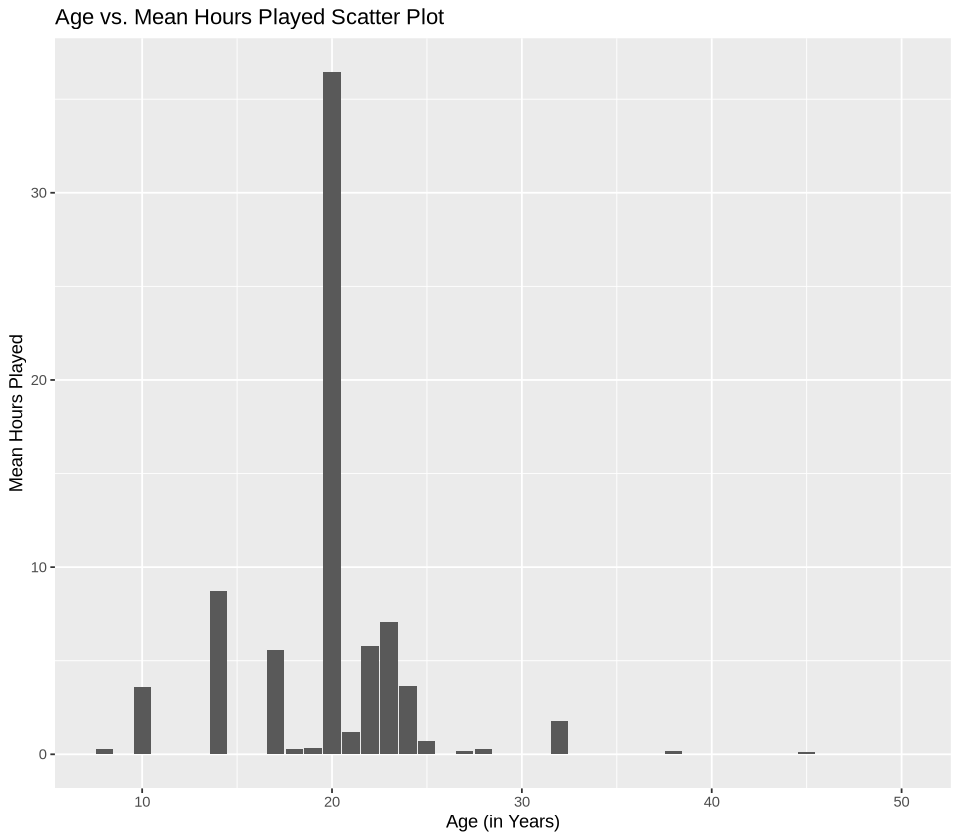

In [44]:
set.seed(123)
players_grouped_graph <- players_grouped|>
    ggplot(aes(x = Age, y = mean_played_time))+
    geom_bar(stat = "identity")+
    labs(x = "Age (in Years)", y = "Mean Hours Played", title = "Age vs. Mean Hours Played Scatter Plot")
players_grouped_graph

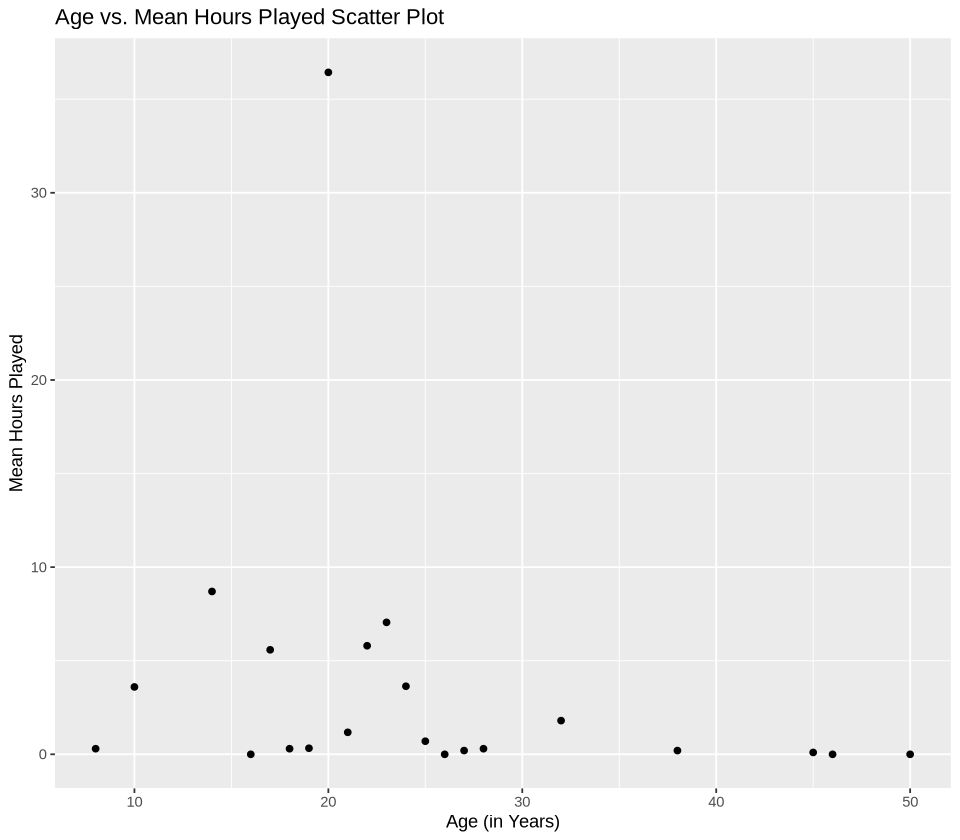

In [45]:
set.seed(123)
players_grouped_scatter <- players_grouped|>
    ggplot(aes(x = Age, y = mean_played_time))+
    geom_point()+
    labs(x = "Age (in Years)", y = "Mean Hours Played", title = "Age vs. Mean Hours Played Scatter Plot")
players_grouped_scatter

In [46]:
set.seed(123)
age_recipe <- recipe(played_hours ~ Age, data = players_training)|>
    step_center(Age)|>
    step_scale(Age)
age_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Centering for: Age

• Scaling for: Age



In [47]:
set.seed(123)
age_model <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune())|>
    set_engine('kknn')|>
    set_mode('regression')
age_model

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [55]:
set.seed(123)
age_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
age_grid <- tibble(neighbors = c(1, 2, 3, 4, 5))

age_w <- workflow()|>
    add_recipe(age_recipe)|>
    add_model(age_model)
age_w

age_workflow <- age_w |>
    tune_grid(resamples = age_vfold, grid = age_grid) |>
    collect_metrics()
age_workflow

age_trained <- age_workflow|>
    filter(.metric == "rmse")|>
    filter(mean == min(mean))
age_trained

age_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 4)|>
    set_engine('kknn')|>
    set_mode('regression')

age_fit <- workflow()|>
    add_recipe(age_recipe)|>
    add_model(age_spec)|>
    fit(data = players_training)
age_fit


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,30.503642554,5,10.033478956,Preprocessor1_Model1
1,rsq,standard,0.012048628,5,0.005788761,Preprocessor1_Model1
2,rmse,standard,31.511107423,5,7.506553322,Preprocessor1_Model2
2,rsq,standard,0.006219815,5,0.001330272,Preprocessor1_Model2
3,rmse,standard,27.254692467,5,8.204097566,Preprocessor1_Model3
3,rsq,standard,0.010504189,5,0.004281664,Preprocessor1_Model3
4,rmse,standard,26.238814281,5,8.396510055,Preprocessor1_Model4
4,rsq,standard,0.005851011,5,0.003333097,Preprocessor1_Model4
5,rmse,standard,26.369261542,5,8.280163522,Preprocessor1_Model5


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,26.23881,5,8.39651,Preprocessor1_Model4


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 7.155
Minimal mean squared error: 913.7863
Best kernel: rectangular
Best k: 4

In [60]:

# ggplot(players_testing, aes(x = played_hours, y = .pred)) +
#   geom_point() +
#   geom_abline(slope = 1, intercept = 0, color = "red") +
#   theme_minimal() +
#   labs(x = "Actual Values", y = "Predicted Values")
